In [1]:
### keras and Tensorflow >2.0

In [3]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
### Data Collection
import pandas_datareader as pdr

In [6]:
key="bd7dbc24e51faff26d3283b833090975d730745d"

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17004\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [9]:
df.to_csv('AAPL.csv')

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
1,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
2,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
3,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0
4,AAPL,2018-08-24 00:00:00+00:00,216.16,216.90,215.11,216.60,18476356,51.752129,51.929297,51.500742,51.857472,73905424,0.0,1.0


In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-10 00:00:00+00:00,177.97,180.75,177.600,179.48,54686851,177.730081,180.506333,177.36058,179.238045,54686851,0.00,1.0
1252,AAPL,2023-08-11 00:00:00+00:00,177.79,178.62,176.550,177.32,52036672,177.790000,178.620000,176.55000,177.320000,52036672,0.24,1.0
1253,AAPL,2023-08-14 00:00:00+00:00,179.46,179.69,177.305,177.97,43675627,179.460000,179.690000,177.30500,177.970000,43675627,0.00,1.0
1254,AAPL,2023-08-15 00:00:00+00:00,177.45,179.48,177.050,178.88,43622593,177.450000,179.480000,177.05000,178.880000,43622593,0.00,1.0
1255,AAPL,2023-08-16 00:00:00+00:00,176.57,178.54,176.500,177.13,46964857,176.570000,178.540000,176.50000,177.130000,46964857,0.00,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1.shape

(1256,)

In [16]:
df1

0       215.46
1       215.04
2       215.05
3       215.49
4       216.16
         ...  
1251    177.97
1252    177.79
1253    179.46
1254    177.45
1255    176.57
Name: close, Length: 1256, dtype: float64

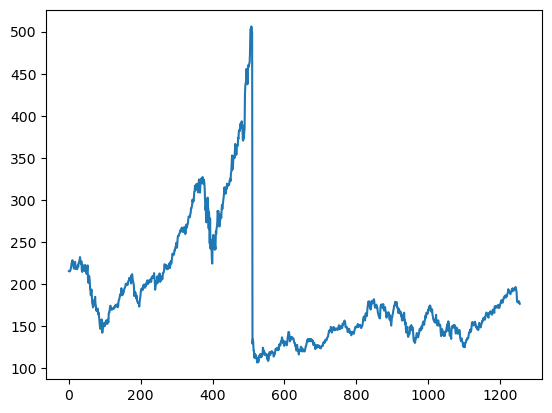

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
### LSTM ARE SENSITIVE TO THE SCALE OF THE DATA . SO WE APPLY MINMAX scaler

In [19]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
 df1.shape

(1256, 1)

In [22]:
##spliting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(816, 440)

In [24]:
len(train_data), len(test_data)

(816, 440)

In [25]:
train_data

array([[2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],


In [26]:
import numpy
# convert an arra of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY =  [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t, t+1,t+2,t+3 and Y=t+4
time_step =  100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest =  create_dataset(test_data, time_step)

In [28]:
print(X_train)

[[0.27206011 0.27100814 0.27103319 ... 0.11639324 0.11762054 0.11383845]
 [0.27100814 0.27103319 0.27213525 ... 0.11762054 0.11383845 0.10810269]
 [0.27103319 0.27213525 0.2738134  ... 0.11383845 0.10810269 0.11579211]
 ...
 [0.05916093 0.06376957 0.06797746 ... 0.1105072  0.1113087  0.10920476]
 [0.06376957 0.06797746 0.06727614 ... 0.1113087  0.10920476 0.1101315 ]
 [0.06797746 0.06727614 0.06654978 ... 0.10920476 0.1101315  0.10289292]]


In [29]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [30]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [34]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
### create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
!pip install tensorflow

In [37]:
### create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 257ms/step - loss: 0.0364 - val_loss: 7.0030e-04
Epoch 2/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0124 - val_loss: 0.0022
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0104 - val_loss: 4.7089e-04
Epoch 4/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0087 - val_loss: 3.5144e-04
Epoch 5/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0083 - val_loss: 8.9514e-04
Epoch 6/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0074 - val_loss: 2.8578e-04
Epoch 7/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0073 - val_loss: 4.4175e-04
Epoch 8/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0069 - val_loss: 5.2285e-04
Epoch 9/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0062 - val_loss: 4.3067e-04
Epoch 10/100
12/12 [==============================] - 2s 18

12/12 [==============================] - 2s 193ms/step - loss: 0.0011 - val_loss: 1.9129e-04
Epoch 79/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0013 - val_loss: 2.7003e-04
Epoch 80/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0024 - val_loss: 4.8119e-04
Epoch 81/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0020 - val_loss: 1.9447e-04
Epoch 82/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0015 - val_loss: 2.2838e-04
Epoch 83/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0015 - val_loss: 1.9543e-04
Epoch 84/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0014 - val_loss: 2.2304e-04
Epoch 85/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0016 - val_loss: 2.0562e-04
Epoch 86/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0014 - val_loss: 1.8998e-04
Epoch 87/100
12/12 [==============================] - 2s 18

In [41]:
## lets do the predictiont and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 72ms/step


In [42]:
## transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

228.82015196597538

In [44]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

164.19671342893204

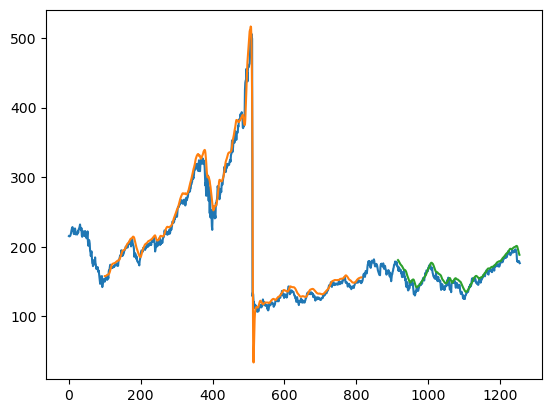

In [45]:
### plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :] =numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]= test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
import tensorflow as tf

In [47]:
tf.__version__

'2.13.0'

In [48]:
### lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 29ms/step


In [49]:
## transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
### calculate RMSE TO ORIGINAL FORM
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


228.82015196597538

In [51]:
441-100


341

In [52]:
len(test_data)

440

In [53]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [54]:
x_input=test_data[341:].reshape(1,-1)

In [55]:
x_input.shape

(1, 99)

In [56]:
temp_input=list(x_input)
temp_input[0].tolist()

[0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,

In [57]:
temp_input

[array([0.12884158, 0.12726362, 0.13507827, 0.13906074, 0.14542267,
        0.14860363, 0.1472511 , 0.14256731, 0.14482154, 0.13823419,
        0.13515341, 0.13340013, 0.14707577, 0.14619912, 0.14624922,
        0.14935504, 0.15226049, 0.14980589, 0.14572323, 0.14649969,
        0.14259236, 0.14256731, 0.15421415, 0.15739512, 0.15716969,
        0.15453976, 0.15180964, 0.14765185, 0.16713838, 0.16696306,
        0.16262993, 0.16710081, 0.16758923, 0.16463369, 0.16338134,
        0.16338134, 0.16493425, 0.17084534, 0.17112085, 0.16871634,
        0.16210394, 0.16280526, 0.16568566, 0.17179712, 0.1764809 ,
        0.17635567, 0.183469  , 0.18562304, 0.18219161, 0.18126487,
        0.17778334, 0.18467126, 0.18564809, 0.19273638, 0.19153413,
        0.19313713, 0.19829681, 0.19556669, 0.19579211, 0.19316218,
        0.20077646, 0.19997495, 0.19644333, 0.20343143, 0.20641202,
        0.20726362, 0.21823419, 0.2144521 , 0.21162179, 0.21282405,
        0.20999374, 0.20480902, 0.20348153, 0.20

In [58]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<29):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)

[0.19945851]
2
[0.19945851]
3
[0.19945851]
4
[0.19945851]
5
[0.19945851]
6
[0.19945851]
7
[0.19945851]
8
[0.19945851]
9
[0.19945851]
10
[0.19945851]
11
[0.19945851]
12
[0.19945851]
13
[0.19945851]
14
[0.19945851]
15
[0.19945851]
16
[0.19945851]
17
[0.19945851]
18
[0.19945851]
19
[0.19945851]
20
[0.19945851]
21
[0.19945851]
22
[0.19945851]
23
[0.19945851]
24
[0.19945851]
25
[0.19945851]
26
[0.19945851]
27
[0.19945851]
28
[0.19945851]
29
[0.19945851]
30
[[0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609], [0.199458509683609

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

1256

ValueError: x and y must have same first dimension, but have shapes (30,) and (29, 1)

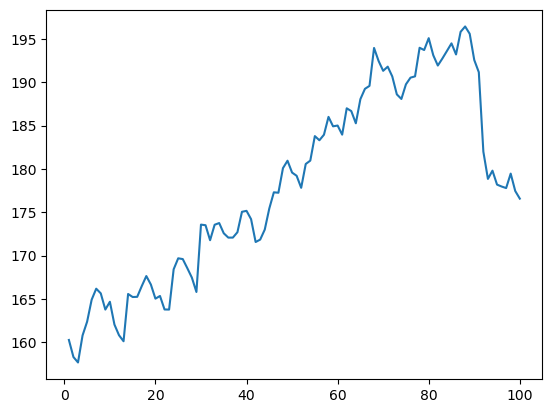

In [65]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

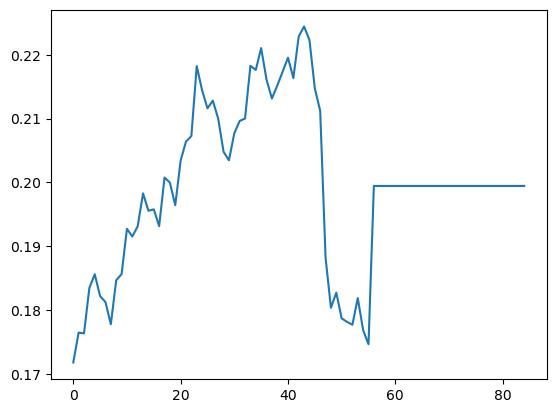

In [66]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [67]:
df3=scaler.inverse_transform(df3).tolist()


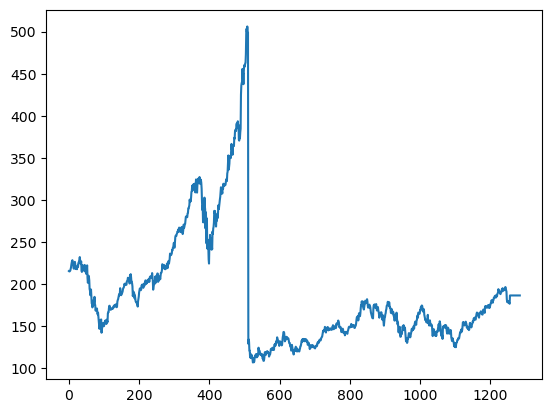

In [68]:
plt.plot(df3)